In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
pd.options.display.float_format = '{:.2f}'.format

In [84]:
data = pd.read_csv('data.csv', encoding = 'ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Количество

In [5]:
# соритровка по количеству
data.sort_values('Quantity').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom


In [6]:
data.sort_values('Quantity').tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,United Kingdom
74614,542504,37413,NaN,5568,1/28/2011 12:03,0.00,NaN,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


In [7]:
#  частота, с которой встречаются строки с отрицательным значением, сгруппированы по описанию
data.query('Quantity < 0')['Description'].value_counts().head()

Manual                      244
REGENCY CAKESTAND 3 TIER    181
POSTAGE                     126
check                       120
JAM MAKING SET WITH JARS     87
Name: Description, dtype: int64

In [8]:
# группировка по описанию, суммируются все отрицательные значения (до удаления)
data.query('Quantity < 0').groupby('Description').sum()['Quantity'].sort_values().head()

Description
PAPER CRAFT , LITTLE BIRDIE      -80995
MEDIUM CERAMIC TOP STORAGE JAR   -74494
printing smudges/thrown away     -19200
Unsaleable, destroyed.           -15644
check                            -13247
Name: Quantity, dtype: int64

In [9]:
data.sort_values('UnitPrice').tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
16356,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:49,13541.33,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,16453.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098.0,United Kingdom


In [27]:
# 
data.query('Quantity == -80995')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


In [28]:
data.query('Quantity == 80995')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


In [40]:
data.query("StockCode == '23843'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


In [85]:
# чистка (удалил количество +/- 80995)
data.drop(data[data['StockCode'] == '23843'].index, inplace = True)

In [86]:
# чистка 2 (удалил количество +/- 74215)
data.drop(data[(data['InvoiceNo'] == '541431') | (data['InvoiceNo'] == 'C541433')].index, inplace = True)

In [87]:
# чистка 3 (удаление всех строк с отрицательным количеством)
data.drop(data[data['Quantity'] < 0].index, inplace = True)

# Работа с ценой

In [37]:
data.query('UnitPrice == -11062.06')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [56]:
data.query('UnitPrice == 38970')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.0,15098.0,United Kingdom


In [52]:
data.query("Description == 'Adjust bad debt'")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [88]:
# чистка 4 (удаляю строки с описанием Adjust bad debt)
data.drop(data[data['Description'] == 'Adjust bad debt'].index, inplace = True)

In [89]:
# для проверки и поиска с какими комментариями указаны максимальные цены
data.sort_values('UnitPrice').tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
422351,573077,M,Manual,1,10/27/2011 14:13,4161.06,12536.00,France
268028,560373,M,Manual,1,7/18/2011 12:30,4287.63,nan,United Kingdom
297723,562955,DOT,DOTCOM POSTAGE,1,8/11/2011 10:14,4505.17,nan,United Kingdom
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029.00,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,nan,United Kingdom


In [90]:
# чистка 5 (удаляю строки с нетоварными комментариями)
data.drop(data[(data['StockCode'] == 'M')| (data['StockCode'] == 'm') | (data['StockCode'] == 'DOT') 
               | (data['StockCode'] == 'POST') | (data['StockCode'] == 'AMAZONFEE')
              | (data['StockCode'] == 'C2') | (data['StockCode'] == 'BANK CHARGES') ].index, inplace = True)

In [17]:
data.sort_values('UnitPrice').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
104404,545176,22365,DOORMAT RESPECTABLE HOUSE,1,2/28/2011 14:19,0.0,NaN,United Kingdom
265296,560216,16162L,NaN,30,7/15/2011 15:11,0.0,NaN,United Kingdom
265298,560218,16162M,alan hodge cant mamage this section,30,7/15/2011 15:12,0.0,NaN,United Kingdom
420404,572893,21208,PASTEL COLOUR HONEYCOMB FAN,5,10/26/2011 14:36,0.0,18059.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom


In [91]:
# чистка 6 (удаляю строки с нулевой ценой)
data.drop(data[data['UnitPrice'] == 0].index, inplace = True)

In [19]:
data.sort_values('UnitPrice').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,9/25/2011 14:58,0.001,16198.0,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,4/15/2011 9:27,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,7/26/2011 10:13,0.001,15618.0,United Kingdom
334170,566233,16045,POPART WOODEN PENCILS ASST,100,9/11/2011 11:04,0.040,12635.0,Germany
362028,568402,16045,POPART WOODEN PENCILS ASST,100,9/27/2011 10:34,0.040,16629.0,United Kingdom


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527792 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    527792 non-null  object 
 1   StockCode    527792 non-null  object 
 2   Description  527792 non-null  object 
 3   Quantity     527792 non-null  int64  
 4   InvoiceDate  527792 non-null  object 
 5   UnitPrice    527792 non-null  float64
 6   CustomerID   396338 non-null  float64
 7   Country      527792 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.2+ MB


In [21]:
# % удаленных данных
(1-527792/541909)*100

2.605049925356473

In [22]:
# описание датафрейма после преобразований
data.describe()

,Quantity,UnitPrice,CustomerID
count,527792.000000,527792.000000,396338.00000
mean,10.272850,3.266578,15301.69364
std,37.732177,4.381159,1709.95439
min,1.000000,0.001000,12347.00000
25%,1.000000,1.250000,13975.00000
50%,3.000000,2.080000,15159.00000
75%,11.000000,4.130000,16803.00000
max,4800.000000,649.500000,18287.00000


# Выбросы

In [23]:
def outliers(x, y, z):
    """ 
    Функция определяющая выбросы в DataFrame, где 1-ый аргумент - DataFrame, к которому применятеся функция, 
    2-ой аргумент - столбец, в котором осуществляется поиск выбросов,
    3-ий аргумент - изменяет результат работы функции: если поставить 0, то возвращаются ячейки с выбросами, 
    если 1, то возвращаются все ячейки, за исключением выбросов и ячеек, в которых в данном столбце стоит NaN. 
    
    """
#     Классический расчет
#     q1 = x[y].quantile(0.25)
#     q3 = x[y].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - (1.5 * iqr) 
#     upper_bound = q3 + (1.5 * iqr)


#     Берем по 15% по краям
    lower_bound = x[y].quantile(0.15) 
    upper_bound = x[y].quantile(0.85)
    
    
# remove_outliers = horse_8col[horse_8col['pulse'].between(lower_bound, upper_bound, inclusive=True)]

    outliers_low = x[x[y] < lower_bound]
    outliers_up = x[x[y] > upper_bound]
    outliers_concat = pd.concat([outliers_low, outliers_up])
    
    remove_outliers = x[x[y].between(lower_bound, upper_bound, inclusive=True)]
    
#     return (q1, q3, iqr, lower_bound, upper_bound)
    
    if z == 0:
        return outliers_concat
    else:
        return remove_outliers

In [24]:
# выбросы в столбце количество
data_1 = outliers(data, 'Quantity', 0)
data_1.sort_values('Quantity').tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,1/11/2011 12:55,2.10,15749.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,7/19/2011 17:04,0.06,14609.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2/22/2011 10:43,0.82,18087.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,5/27/2011 10:52,0.72,13135.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,United Kingdom


In [25]:
# выбросы в столбце UnitPrice
data_1 = outliers(data, 'UnitPrice', 0)
data_1.sort_values('UnitPrice').tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,3/14/2011 11:38,295.0,13452.0,United Kingdom
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,1/10/2011 14:57,295.0,17406.0,United Kingdom
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,12/2/2010 18:06,295.0,13145.0,United Kingdom
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,6/10/2011 15:33,649.5,15098.0,United Kingdom
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.5,15098.0,United Kingdom


# Корреляция

In [92]:
# удалим столбец CustomerID, т.к. данные в нем синтетические и не влияют на продажи
data_1 = data.drop(['CustomerID'], axis=1)

In [93]:
data_1.corr()

,Quantity,UnitPrice
Quantity,1.00,-0.09
UnitPrice,-0.09,1.00


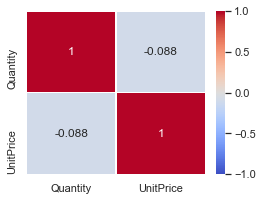

In [95]:
sns.set(rc={'figure.figsize':(4, 3)})
sns.heatmap(data_1.corr(), annot = True, center = 0, vmin=-1, vmax=1, cmap="coolwarm", linewidths=.5)

In [30]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527792 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    527792 non-null  object 
 1   StockCode    527792 non-null  object 
 2   Description  527792 non-null  object 
 3   Quantity     527792 non-null  int64  
 4   InvoiceDate  527792 non-null  object 
 5   UnitPrice    527792 non-null  float64
 6   Country      527792 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 32.2+ MB


In [10]:
import datetime as dt

In [11]:
# преобразуем InvoiceDate в объект datetime и разобъем его на составляющие части
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['Sales'] = data.Quantity*data.UnitPrice
data['Year']=data.InvoiceDate.dt.year
data['Month']=data.InvoiceDate.dt.month
data['Week']=data.InvoiceDate.dt.week

data['Year_Month']=data.InvoiceDate.dt.to_period('M')
data['Hour']=data.InvoiceDate.dt.hour
data['Day']=data.InvoiceDate.dt.day

data['weekday'] = data.InvoiceDate.dt.day_name()

data['Date']=pd.to_datetime(data[['Year','Month','Day']])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month,Week,Year_Month,Hour,Day,weekday,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,48,2010-12,8,1,Wednesday,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,Wednesday,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,48,2010-12,8,1,Wednesday,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,Wednesday,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,Wednesday,2010-12-01


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527792 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    527792 non-null  object        
 1   StockCode    527792 non-null  object        
 2   Description  527792 non-null  object        
 3   Quantity     527792 non-null  int64         
 4   InvoiceDate  527792 non-null  datetime64[ns]
 5   UnitPrice    527792 non-null  float64       
 6   CustomerID   396338 non-null  float64       
 7   Country      527792 non-null  object        
 8   Sales        527792 non-null  float64       
 9   Year         527792 non-null  int64         
 10  Month        527792 non-null  int64         
 11  Week         527792 non-null  int64         
 12  Year_Month   527792 non-null  period[M]     
 13  Hour         527792 non-null  int64         
 14  Day          527792 non-null  int64         
 15  weekday      527792 non-null  obje

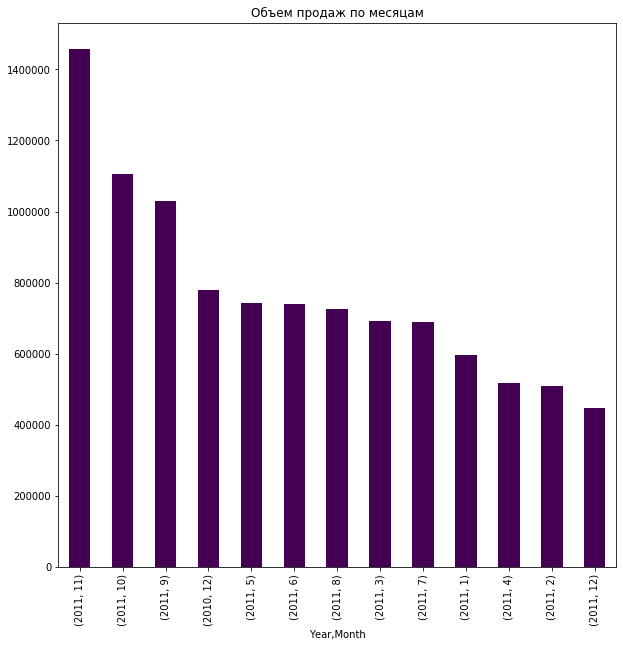

In [68]:
# график объема продаж по месяцам
data.groupby(['Year','Month']).sum().sort_values('Sales', ascending = False)['Sales'].plot(
    kind='bar', title='Объем продаж по месяцам',
    figsize=(10,10), colormap = 'viridis')

In [35]:
# сформируем отдельный датафрейм с данными по количеству и продажам
data_year_sales = data.groupby(['Year','Month']).sum()[['Quantity', 'Sales']]
data_year_sales = data_year_sales.reset_index()
data_year_sales

,Year,Month,Quantity,Sales
0,2010,12,358751,778008.360
1,2011,1,313212,594808.810
2,2011,2,283251,508952.870
3,2011,3,377110,691265.940
4,2011,4,308519,516339.791
5,2011,5,395394,741275.740
6,2011,6,388831,738876.880
7,2011,7,401358,689397.741
8,2011,8,421451,725605.160
9,2011,9,569949,1030500.361


In [36]:
# удаление строки с декабрем 2011 года (т.к. данные только за 9 дней)
data_year_sales.drop([12], inplace = True)

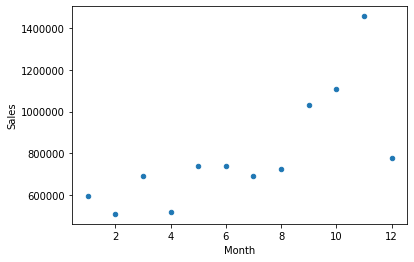

In [37]:
# визуализация на графике данных по продажам
data_year_sales.plot(kind = 'scatter', x = 'Month', y = 'Sales')

In [38]:
# расчет корреляции по новому датафрейму
data_year_sales.corr()

,Year,Month,Quantity,Sales
Year,1.000000,-0.480384,0.164039,0.023333
Month,-0.480384,1.000000,0.695942,0.733925
Quantity,0.164039,0.695942,1.000000,0.981907
Sales,0.023333,0.733925,0.981907,1.000000


In [12]:
import seaborn as sns

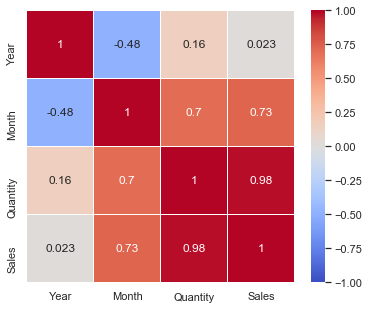

In [90]:
sns.set(rc={'figure.figsize':(6, 5)})
sns.heatmap(data_year_sales.corr(), annot = True, center = 0, vmin=-1, vmax=1, cmap="coolwarm", linewidths=.5)

# Регрессия

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.model_selection import train_test_split

In [41]:
X = data_year_sales[['Year', 'Month']]
y = data_year_sales['Sales']

In [42]:
y.shape

(12,)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [50]:
# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# коэффициент, стоящий при X
model.coef_

array([452770.19314653,  72339.97567735])

In [52]:
# Коэффциент
model.intercept_

-910158159.5726593

In [53]:
# предсказанные значения
y_pred = model.predict(X_test)
y_pred

array([1086098.60179186, 1013758.62611449])

# Оценка качества регрессионной модели

In [169]:
# коэффициент детерминации
model.score(X_test, y_test)

0.7571132155072191

In [171]:
from sklearn.metrics import r2_score

In [172]:
r2_score(y_test, y_pred)

0.7571132155072191

In [173]:
from sklearn.metrics import mean_squared_error

In [177]:
mean_squared_error(y_test, y_pred, squared=False)

18781.756834207692

In [75]:
# сформируем датафрейм для расчета прогноза продаж на 2012 год
next_period = [{'Year': 2012, 'Month':1}, {'Year': 2012, 'Month':2}, {'Year': 2012, 'Month':3}, 
               {'Year': 2012, 'Month':4}, {'Year': 2012, 'Month':5}, {'Year': 2012, 'Month':6}, 
               {'Year': 2012, 'Month':7}, {'Year': 2012, 'Month':8}, {'Year': 2012, 'Month':9}, 
               {'Year': 2012, 'Month':10}, {'Year': 2012, 'Month':11}, {'Year': 2012, 'Month':12}]
df_next_period = pd.DataFrame(next_period)

In [76]:
# Предсказанные значения на 2012 год
y_pred_next = model.predict(df_next_period)
y_pred_next = pd.DataFrame(y_pred_next)
y_pred_next.columns = ['Sales']


In [77]:
df_next_period.join(y_pred_next)

,Year,Month,Sales
0,2012,1,887809.01
1,2012,2,960148.99
2,2012,3,1032488.97
3,2012,4,1104828.94
4,2012,5,1177168.92
5,2012,6,1249508.89
6,2012,7,1321848.87
7,2012,8,1394188.84
8,2012,9,1466528.82
9,2012,10,1538868.79


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


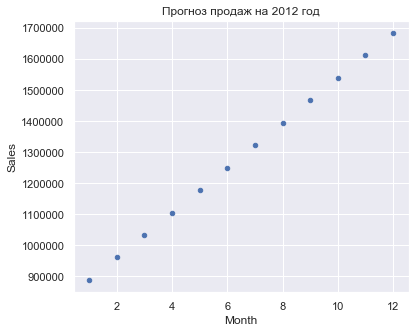

In [181]:
df_next_period.join(y_pred_next).plot(kind = 'scatter', x = 'Month', y = 'Sales', title = 'Прогноз продаж на 2012 год')

# Прогноз продаж 5 позиций

In [132]:
# скопируем датафрейм для дальнейших преобразований
data_edit = data.copy(deep=True)

In [135]:
# Удалим строки из датафрема data_edit, соответсвующие декабрю 2011 года, т.к. данные только за 9 дней 
data_edit.drop(data_edit[(data_edit['Year'] == 2011) & (data_edit['Month'] == 12)].index, inplace = True)

In [133]:
# топ-5 продаваемых товаров по количеству за весь период наблюдений
data.groupby('Description').sum().sort_values('Quantity', ascending = False)['Quantity'].reset_index().head()

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
1,JUMBO BAG RED RETROSPOT,48474
2,WHITE HANGING HEART T-LIGHT HOLDER,37891
3,POPCORN HOLDER,36761
4,ASSORTED COLOUR BIRD ORNAMENT,36461


In [134]:
# топ-5 продаваемых товаров по полученному доходу за весь период наблюдений
data.groupby('Description').sum().sort_values('Sales', ascending = False)['Sales'].reset_index().head()

,Description,Sales
0,REGENCY CAKESTAND 3 TIER,174484.74
1,WHITE HANGING HEART T-LIGHT HOLDER,106292.77
2,PARTY BUNTING,99504.33
3,JUMBO BAG RED RETROSPOT,94340.05
4,RABBIT NIGHT LIGHT,66964.99


In [184]:
# продажи 
data_1 = data_edit.query('Description == "PARTY BUNTING"')
data_1 = data_1.groupby(['Year','Month']).sum()['Sales'].reset_index()
data_1

,Year,Month,Sales
0,2010,12,1207.74
1,2011,1,2288.36
2,2011,2,4347.90
3,2011,3,9123.02
4,2011,4,10778.47
5,2011,5,19147.75
6,2011,6,12561.07
7,2011,7,14576.50
8,2011,8,9694.85
9,2011,9,6402.95


In [185]:
data_1.corr()

,Year,Month,Sales
Year,1.00,-0.48,0.41
Month,-0.48,1.00,-0.22
Sales,0.41,-0.22,1.00


In [186]:
X_1 = data_1[['Year', 'Month']]
y_1 = data_1['Sales']

y.shape
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.15, random_state=42)

# Обучение модели
model_1 = LinearRegression()
model_1.fit(X_1_train, y_1_train)

# коэффициент, стоящий при X
print(f'Коэффициент при X {model_1.coef_}')

# Коэффциент
print(f'Коэффициент {model_1.intercept_}')

# предсказанные значения
y_1_pred = model_1.predict(X_1_test)


# коэффициент детерминации
print(f'Коэффициент детерминации {model_1.score(X_1_test, y_1_test)}')




Коэффициент при X [10926.87761173   359.88325419]
Коэффициент -21966134.858631272
Коэффициент детерминации -21.420626460637397


# По странам

In [18]:
qwerty = dict(data.groupby('CustomerID').sum().sort_values('Sales', ascending = False).head(10)['Sales'])

In [19]:
for id in qwerty.keys():
    qwerty[id] = (data.query(f'CustomerID == "{id}"')['Country'].value_counts().reset_index()['index'][0])

In [20]:
qwerty = pd.DataFrame.from_dict(qwerty,'index').reset_index()

In [21]:
# топ-10 клиентов по доходам магазина
qwerty.columns = ['CustomerID', 'Country']
qwerty

,CustomerID,Country
0,14646.00,Netherlands
1,18102.00,United Kingdom
2,17450.00,United Kingdom
3,14911.00,EIRE
4,12415.00,Australia
5,14156.00,EIRE
6,17511.00,United Kingdom
7,16029.00,United Kingdom
8,16684.00,United Kingdom
9,13694.00,United Kingdom


In [25]:
customer_sales = data.groupby('CustomerID').sum().sort_values('Sales', ascending = False).reset_index().head(10)[['CustomerID','Sales']]
customer_sales

,CustomerID,Sales
0,14646.00,279138.02
1,18102.00,259657.30
2,17450.00,194550.79
3,14911.00,136275.72
4,12415.00,124564.53
5,14156.00,116729.63
6,17511.00,91062.38
7,16029.00,72882.09
8,16684.00,66653.56
9,13694.00,65039.62


In [27]:
# топ-10 клиентов с указанием страны и дохода
qwerty.merge(customer_sales, how = 'left', on = 'CustomerID')

,CustomerID,Country,Sales
0,14646.00,Netherlands,279138.02
1,18102.00,United Kingdom,259657.30
2,17450.00,United Kingdom,194550.79
3,14911.00,EIRE,136275.72
4,12415.00,Australia,124564.53
5,14156.00,EIRE,116729.63
6,17511.00,United Kingdom,91062.38
7,16029.00,United Kingdom,72882.09
8,16684.00,United Kingdom,66653.56
9,13694.00,United Kingdom,65039.62


In [61]:
# топ-10 стран по объемам продаж
top_10_countries = data.groupby('Country').sum().sort_values('Sales', ascending = False).reset_index().head(10)[['Country','Sales']]

In [58]:
def percent(row):
    """функция подсчитывает долю покупок страны в общем объеме продаж"""
    all_sales = data['Sales'].sum()
    return (row['Sales']/all_sales) * 100

In [62]:
top_10_countries['percent'] = top_10_countries.apply(percent, axis = 1 )

In [67]:
top_10_countries

,Country,Sales,percent
0,United Kingdom,8502657.32,84.80
1,Netherlands,283889.34,2.83
2,EIRE,271164.30,2.70
3,Germany,205569.89,2.05
4,France,184582.74,1.84
5,Australia,138171.31,1.38
6,Spain,55725.11,0.56
7,Switzerland,53087.90,0.53
8,Japan,37416.37,0.37
9,Belgium,36927.34,0.37


In [80]:
top_10_countries['percent'].sum()

97.43343776188415

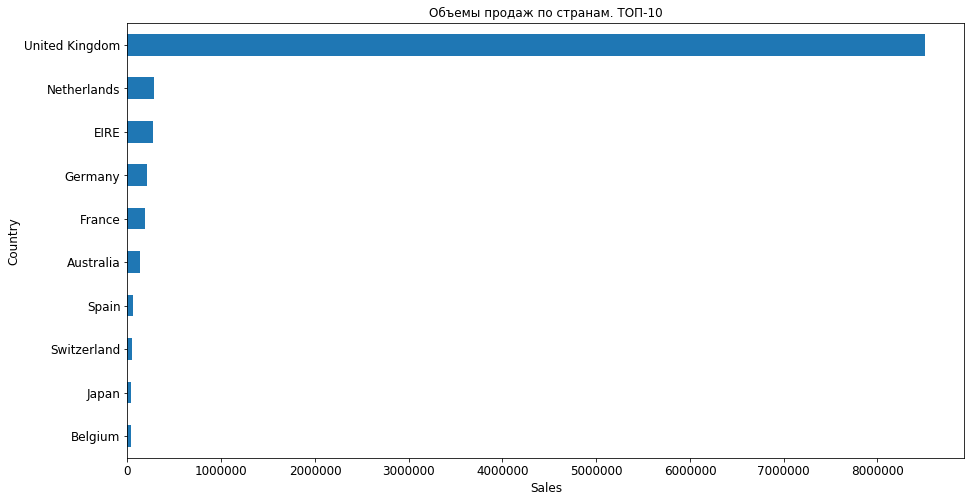

In [78]:
group_country_orders = data.groupby('Country')['Sales'].sum().sort_values(ascending = True).tail(10)

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Объемы продаж по странам. ТОП-10', fontsize=12)
plt.show()